<a href="https://colab.research.google.com/github/iamwendellbalagot/google-colab/blob/master/Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_style('whitegrid')

from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC, LinearSVC, SVR

import warnings
warnings.filterwarnings('ignore')

In [ ]:
X, y = make_moons(1000, noise=0.15)

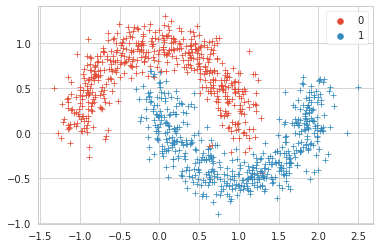

In [ ]:
sns.scatterplot(X[:,0], X[:,1], hue=y, marker='+');

In [ ]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)
dct_clf = DecisionTreeClassifier(max_depth=3)

voting_clf = VotingClassifier(estimators=[
  ('lr', log_clf),
  ('dct', dct_clf),
  ('svc', svm_clf)
], voting='soft')


In [ ]:
from sklearn.metrics import accuracy_score

for model in (log_clf, dct_clf, svm_clf, voting_clf):
  hist = model.fit(X, y)
  pred = model.predict(X)
  print(model.__class__.__name__ + ' accuracy: {0}'.format(accuracy_score(pred, y)))

LogisticRegression accuracy: 0.88
DecisionTreeClassifier accuracy: 0.92
SVC accuracy: 0.987
VotingClassifier accuracy: 0.949


In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=500, 
                            bootstrap=True,
                            max_samples=100,
                            n_jobs=-1)
bag_clf.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [ ]:
print(bag_clf.__class__.__name__ + ' accuracy: {0}'.\
      format(accuracy_score(y, bag_clf.predict(X))))

BaggingClassifier accuracy: 0.976


In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=500, 
                            bootstrap=False,
                            max_samples=100,
                            n_jobs=-1)
bag_clf.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [ ]:
print(bag_clf.__class__.__name__ + ' accuracy: {0}'.\
      format(accuracy_score(y, bag_clf.predict(X))))

BaggingClassifier accuracy: 0.976


In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=500, 
                            bootstrap=True,
                            oob_score=True,
                            max_samples=100,
                            n_jobs=-1)
bag_clf.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [ ]:
print(bag_clf.__class__.__name__ + ' accuracy: {0}'.\
      format(accuracy_score(y, bag_clf.predict(X))))

BaggingClassifier accuracy: 0.976


In [ ]:
print('Most likely score of model on the test set: ',bag_clf.oob_score_)

Most likely score of model on the test set:  0.973


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, max_depth=3)
rnd_clf.fit(iris['data'], iris['target'])


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
print('FEATURE IMPORTANCE:')
for feat, imp in zip(iris['feature_names'], rnd_clf.feature_importances_):
  print(feat, ':', round(imp*100,2), '%')

FEATURE IMPORTANCE:
sepal length (cm) : 9.19 %
sepal width (cm) : 1.14 %
petal length (cm) : 45.14 %
petal width (cm) : 44.53 %


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=500,
                               algorithm='SAMME.R', learning_rate=0.1)
ada_boost.fit(iris['data'], iris['target'])

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [ ]:
accuracy_score(iris['target'], ada_boost.predict(iris['data']))

1.0

In [ ]:
print('FEATURE IMPORTANCE:')
for feat, imp in zip(iris['feature_names'], ada_boost.feature_importances_):
  print(feat, ':', round(imp*100,2), '%')

FEATURE IMPORTANCE:
sepal length (cm) : 19.57 %
sepal width (cm) : 16.88 %
petal length (cm) : 31.32 %
petal width (cm) : 32.23 %


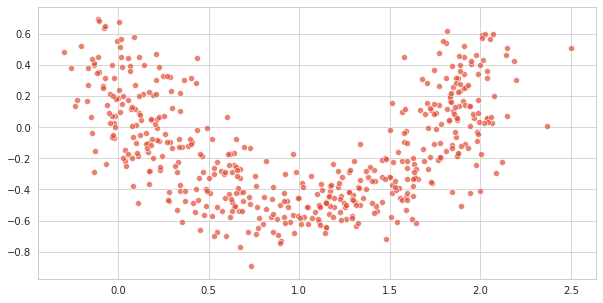

In [ ]:
train_x = X[np.where(y==1), 0].reshape(-1,)
train_y = X[np.where(y==1), 1].reshape(-1,)

plt.figure(figsize=(10,5))
sns.scatterplot(train_x, train_y, alpha=0.7);

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(max_depth=3, learning_rate=0.1, n_estimators=100)
gb.fit(train_x.reshape(-1,1), train_y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

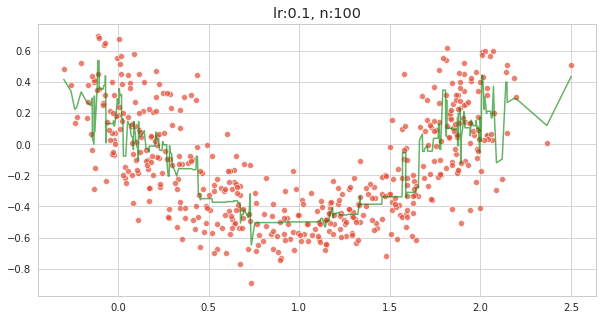

In [ ]:
plt.figure(figsize=(10,5))
plt.title('lr:0.1, n:100')
sns.scatterplot(train_x, train_y, alpha=0.7)
sns.lineplot(train_x, gb.predict(train_x.reshape(-1,1)), color='green', alpha=0.6);

In [ ]:
gb = GradientBoostingRegressor(max_depth=3, learning_rate=0.01, n_estimators=1000)
gb.fit(train_x.reshape(-1,1), train_y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

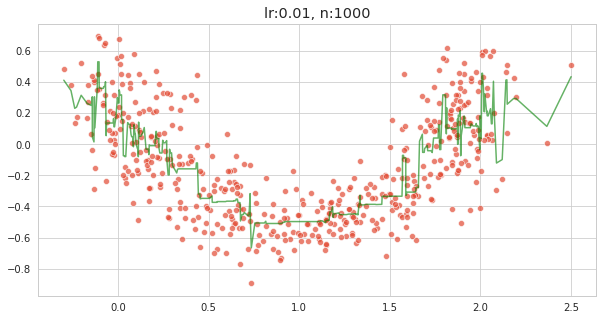

In [ ]:
plt.figure(figsize=(10,5))
plt.title('lr:0.01, n:1000')
sns.scatterplot(train_x, train_y, alpha=0.7)
sns.lineplot(train_x, gb.predict(train_x.reshape(-1,1)), color='green', alpha=0.6);

In [ ]:
from sklearn.metrics import mean_squared_error
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(train_x.reshape(-1,1), train_y)
errors = []
[errors.append(mean_squared_error(train_y, pred)) \
 for pred in gbrt.staged_predict(train_x.reshape(-1,1))]

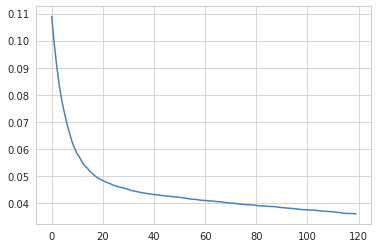

In [ ]:
plt.plot(errors, color='steelblue');

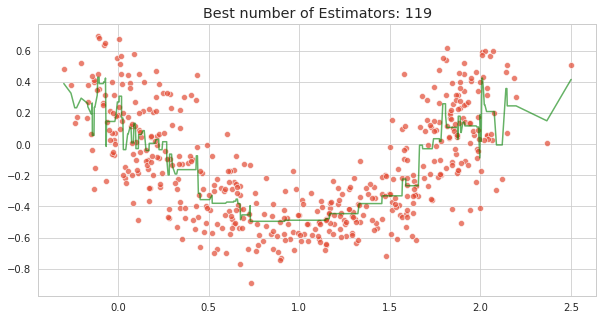

In [ ]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=np.argmin(errors))
gbrt.fit(train_x.reshape(-1,1), train_y)

plt.figure(figsize=(10,5))
plt.title('Best number of Estimators: ' + str(np.argmin(errors)))
sns.scatterplot(train_x, train_y, alpha=0.7)
sns.lineplot(train_x, gbrt.predict(train_x.reshape(-1,1)), color='green', alpha=0.6);

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.1057           0.0111            0.33s
         2           0.1036           0.0100            0.53s
         3           0.0957           0.0085            0.52s
         4           0.0980           0.0070            0.47s
         5           0.0680           0.0050            0.43s
         6           0.0799           0.0026            0.39s
         7           0.0586           0.0035            0.38s
         8           0.0632           0.0031            0.35s
         9           0.0604           0.0023            0.32s
        10           0.0665           0.0019            0.33s
        20           0.0476           0.0003            0.21s
        30           0.0394          -0.0003            0.16s
        40           0.0497          -0.0002            0.14s
        50           0.0408           0.0000            0.12s
        60           0.0389          -0.0001            0.11s
       

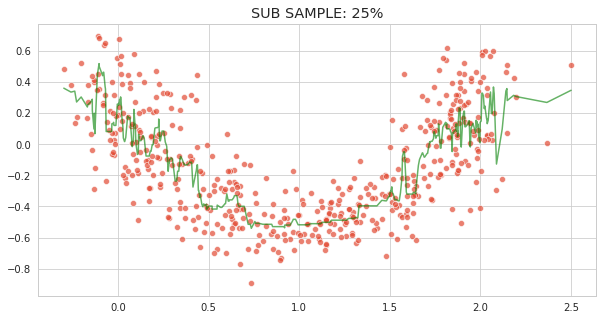

In [ ]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=200, subsample=0.25, verbose=1)
gbrt.fit(train_x.reshape(-1,1), train_y)

plt.figure(figsize=(10,5))
plt.title('SUB SAMPLE: 25%')
sns.scatterplot(train_x, train_y, alpha=0.7)
sns.lineplot(train_x, gbrt.predict(train_x.reshape(-1,1)), color='green', alpha=0.6);